In [1]:
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
dataframe = pd.read_csv('news/Biden_output.csv')
# dataframe_Trump = pd.read_csv('news/Trump_output.csv')
# dataframe_Harris = pd.read_csv('news/Harris_output.csv')
# dataframe = pd.concat([dataframe_Biden, dataframe_Trump, dataframe_Harris], ignore_index=True)
dataframe.head(5)

,title,date,content
0,"President Biden honors Kirk Herbstreit’s late,...",2024-12-04,President Joe Biden sent a heartfelt letter to...
1,Biden wraps historic Africa trip overshadowed ...,2024-12-04,President Joe Biden grinned as he posed for ph...
2,Judge in Hunter Biden’s tax case blasts Joe Bi...,2024-12-03,The federal judge who oversaw Hunter Biden’s t...
3,Biden acknowledges horrific history of slavery...,2024-12-03,President Joe Biden on Tuesday acknowledged ho...
4,Democrats left fuming over Biden’s decision to...,2024-12-03,President Joe Biden’s decision to pardon his s...


In [3]:
print(dataframe.isnull().sum())
dataframe = dataframe.dropna()
print(dataframe.isnull().sum())

title      0
date       0
content    0
dtype: int64
title      0
date       0
content    0
dtype: int64


In [4]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
title_tfidf_vectors = tfidf_vectorizer.fit_transform(dataframe['title'])
title_tfidf_vectors.shape

(626, 2041)

In [5]:
text_tfidf_vectorizer = TfidfVectorizer(stop_words='english')
text_tfidf_vectors = text_tfidf_vectorizer.fit_transform(dataframe['content'])
text_tfidf_vectors.shape

(626, 19381)

In [6]:
dbscan = DBSCAN(metric='euclidean', eps=1.19, min_samples=2)
dbscan.fit(text_tfidf_vectors)

clusters = dbscan.labels_
coords = text_tfidf_vectors.toarray()

no_clusters = len(np.unique(clusters))
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')
print(Counter(clusters))

Estimated no. of clusters: 31
Estimated no. of noise points: 92
Counter({np.int64(1): 438, np.int64(-1): 92, np.int64(2): 13, np.int64(9): 10, np.int64(3): 6, np.int64(18): 5, np.int64(20): 5, np.int64(5): 4, np.int64(10): 4, np.int64(21): 4, np.int64(0): 3, np.int64(4): 3, np.int64(17): 3, np.int64(6): 2, np.int64(7): 2, np.int64(8): 2, np.int64(11): 2, np.int64(12): 2, np.int64(13): 2, np.int64(14): 2, np.int64(15): 2, np.int64(16): 2, np.int64(19): 2, np.int64(22): 2, np.int64(23): 2, np.int64(24): 2, np.int64(25): 2, np.int64(26): 2, np.int64(27): 2, np.int64(28): 2, np.int64(29): 2})


In [7]:
cluster1 = dataframe[clusters == 2]
cluster1.head(5)

,title,date,content
13,Biden fades from view as he exits the world st...,2024-11-19,President Joe Biden’s exit from the world stag...
16,Biden makes first presidential visit to the Am...,2024-11-17,When President Joe Biden worked to burnish his...
17,Trump looms over Biden’s final meeting with Xi...,2024-11-16,President Joe Biden and his Chinese counterpar...
18,Biden set to meet with world leaders who have ...,2024-11-14,When President Joe Biden’s aides were planning...
19,Biden to meet for a final time with Xi this we...,2024-11-13,President Joe Biden will meet for a final time...


In [8]:
n_clusters = 12
cost_text = []
cost_title = []

for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(text_tfidf_vectors)
    cost_text.append(kmeans.inertia_)

for i in range(2, n_clusters):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(title_tfidf_vectors)
    cost_title.append(kmeans.inertia_)

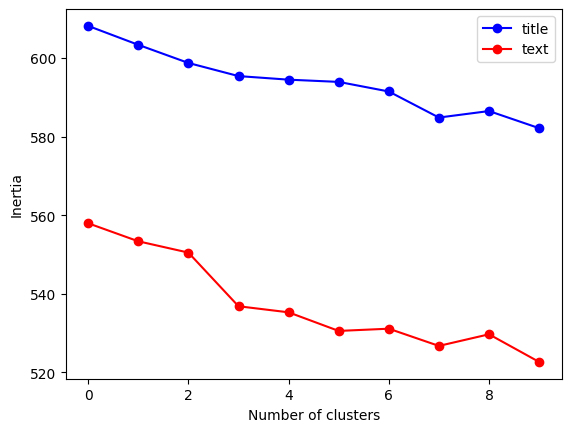

In [9]:
plt.plot(cost_title, 'bo-', label='title')
plt.plot(cost_text, 'ro-', label='text')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
final_n_clusters = 10

title_kmeans = KMeans(final_n_clusters, n_init='auto')
text_kmeans = KMeans(final_n_clusters, n_init='auto')

title_kmeans.fit(title_tfidf_vectors)
text_kmeans.fit(text_tfidf_vectors)

print(f'Title labels: {title_kmeans.labels_}')
print(f'Text labels: {text_kmeans.labels_}')

Title labels: [7 2 2 2 6 7 1 2 2 2 9 2 1 2 2 2 1 1 7 9 7 2 7 4 4 6 1 1 1 4 2 2 2 2 2 2 2
 2 2 1 9 4 2 2 4 7 4 2 7 7 7 4 2 2 6 2 2 2 2 4 2 0 2 1 7 2 2 1 2 2 2 9 4 2
 6 2 2 4 2 4 7 4 4 2 2 6 7 2 2 2 7 4 2 2 7 2 4 1 1 7 7 1 2 7 6 7 2 2 2 2 4
 7 2 7 1 1 7 0 7 4 2 2 9 4 4 2 1 6 2 7 2 2 2 6 2 4 2 2 2 7 0 4 1 2 7 2 9 1
 4 2 7 6 2 2 2 7 6 4 5 4 2 2 2 7 9 7 4 7 9 0 7 4 1 2 7 6 7 2 6 2 2 2 2 4 7
 6 7 7 7 2 6 4 7 5 2 1 2 2 9 7 2 6 4 1 2 9 1 7 2 6 2 7 4 2 6 4 2 7 2 2 6 7
 4 5 1 4 4 2 2 4 2 6 7 2 2 1 7 1 2 5 1 6 5 7 1 1 2 2 4 1 2 2 2 1 7 4 2 5 2
 2 2 8 4 1 2 2 2 4 4 2 4 1 2 5 2 1 2 0 2 5 5 2 2 7 2 2 2 2 5 2 2 2 6 2 2 2
 1 2 2 2 2 1 2 2 3 2 2 6 6 2 7 5 1 2 5 9 2 2 2 2 2 6 9 4 1 5 2 9 4 2 2 2 4
 2 2 2 0 2 5 2 2 1 2 7 5 8 2 2 2 2 5 1 2 2 7 2 2 2 2 7 8 9 9 7 7 2 2 7 5 2
 2 8 2 8 8 2 2 2 4 2 1 9 1 2 7 2 2 4 7 2 2 8 1 2 4 5 2 1 2 2 7 2 2 5 7 1 2
 9 7 6 9 7 2 8 2 7 4 2 9 7 2 2 9 9 9 9 4 7 4 2 5 4 1 2 1 1 2 5 5 2 5 2 1 2
 4 2 8 9 2 5 2 4 2 4 5 2 1 2 2 2 7 7 2 5 2 1 4 4 2 7 1 5 1 1 9 6 6 4 5 2 6
 6 6 0 6 4 

In [11]:
order_centroids = title_kmeans.cluster_centers_.argsort()[:, ::-1]
print('------ Key words of title cluster ------')
for i in range(final_n_clusters):
    print(f'\n\nCluster {i} keywords: ')
    for ind in order_centroids[i, :10]:
        print(tfidf_vectorizer.get_feature_names_out()[ind])

------ Key words of title cluster ------


Cluster 0 keywords: 
primary
challenge
long
cnn
dean
politics
phillips
ends
biden
projects


Cluster 1 keywords: 
trump
politics
biden
cnn
2024
debate
presidential
term
election
hopes


Cluster 2 keywords: 
politics
biden
cnn
hunter
trial
gun
business
administration
takeaways
interview


Cluster 3 keywords: 
robocall
fake
consultant
allegedly
phillips
ai
hampshire
admits
new
distances


Cluster 4 keywords: 
campaign
harris
politics
biden
cnn
jill
trail
ad
trump
reelection


Cluster 5 keywords: 
opinion
biden
cnn
trump
voters
common
immigration
speech
donald
economy


Cluster 6 keywords: 
democrats
state
union
cnn
politics
biden
visit
say
address
opinion


Cluster 7 keywords: 
says
president
politics
cnn
biden
democratic
leaders
questions
office
trump


Cluster 8 keywords: 
protests
college
coalition
politics
cnn
campus
tensions
biden
highlight
morehouse


Cluster 9 keywords: 
amid
netanyahu
time
politics
biden
cnn
speak
political
inflation
thu

In [12]:
order_centroids = text_kmeans.cluster_centers_.argsort()[:, ::-1]
print('------ Key words of text cluster ------')
for i in range(final_n_clusters):
    print(f'\n\nCluster {i} keywords: ')
    for ind in order_centroids[i, :10]:
        print(text_tfidf_vectorizer.get_feature_names_out()[ind])

------ Key words of text cluster ------


Cluster 0 keywords: 
biden
tax
inflation
budget
economy
prices
income
rate
funding
medicare


Cluster 1 keywords: 
biden
debate
president
said
campaign
democratic
house
cnn
democrats
performance


Cluster 2 keywords: 
biden
trump
campaign
president
voters
said
harris
democratic
black
election


Cluster 3 keywords: 
biden
president
said
trump
border
ukraine
administration
house
campaign
white


Cluster 4 keywords: 
hunter
biden
gun
son
trial
prosecutors
case
president
charges
tax


Cluster 5 keywords: 
israel
biden
netanyahu
gaza
israeli
hamas
said
borrowers
war
student


Cluster 6 keywords: 
monuments
native
boarding
monument
indian
children
acres
charging
apology
lands


Cluster 7 keywords: 
lady
husband
biden
jill
women
president
campaign
said
dr
games


Cluster 8 keywords: 
hur
biden
documents
classified
report
president
memory
counsel
special
age


Cluster 9 keywords: 
delegates
convention
ohio
roll
virtual
dnc
party
process
ballot
biden
